In [21]:
from sklearn import datasets
import numpy as np
boston = datasets.load_boston()
# print(boston.DESCR)
# print(boston.data)
# print(boston.target)
# datasets.load_*?

In [23]:
housing = datasets.fetch_california_housing()
# print(housing.DESCR)
housing.data
datasets.fetch_*?

In [26]:
from sklearn import datasets
datasets.make_*?

In [32]:
from sklearn import datasets
reg_data = datasets.make_regression()
reg_data[0].shape,reg_data[1].shape
# print(reg_data)
# reg_data[1]

((100, 100), (100,))

In [53]:
from sklearn import datasets
classification_set = datasets.make_classification(weights=[0.1])
np.bincount(classification_set[1])

array([10, 90], dtype=int64)

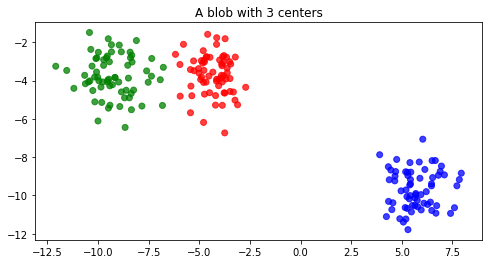

In [56]:
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np
blobs = datasets.make_blobs(200)
f = plt.figure(figsize=(8, 4))
ax = f.add_subplot(111)
ax.set_title("A blob with 3 centers")
colors = np.array(['r', 'g', 'b'])
ax.scatter(blobs[0][:, 0], blobs[0][:, 1], color=colors[blobs[1].astype(int)], alpha=0.75)

In [104]:
import numpy as np
n_samples = 5
n_features = 2
X = np.random.randn(n_samples, n_features)
ground_truth = np.zeros((n_samples, n_features))
n_informative = 5
n_targets = 2
ground_truth[:n_informative, :] = 100*np.random.rand(n_informative,n_targets)
print(ground_truth)
print(X)
np.dot(ground_truth, X.T)

[[96.40602791 58.46830359]
 [64.12558782 45.06295684]
 [77.38267207 75.82074358]
 [38.24270781 94.91870925]
 [50.76741807 97.66919153]]
[[-0.00848872 -0.66468082]
 [-1.29527838 -0.10578922]
 [ 1.17084784  0.64304901]
 [ 0.64442306  1.73362596]
 [-0.70083073 -0.15758701]]


array([[ -39.68112388, -131.05796043,  150.47477456,  163.48843651,
         -76.77815199],
       [ -30.49682736,  -87.82766294,  104.05899594,  119.44631938,
         -52.0425191 ],
       [ -51.05347401, -108.25311999,  139.35978871,  181.31198777,
         -66.18051875],
       [ -63.41527733,  -59.57632932,  105.8137738 ,  189.1980213 ,
         -41.75962032],
       [ -65.34978892,  -76.09028716,  122.2469987 ,  202.0375409 ,
         -50.97076242]])

In [18]:
from sklearn import preprocessing,datasets
import numpy as np
boston = datasets.load_boston()
X, y = boston.data, boston.target
X[:, :3].mean(axis=0) #前三个特征的均值
X[:, :3].std(axis=0) #前三个特征的标准差

X_2 = preprocessing.scale(X[:, :3])
X_2.mean(axis=0)
X_2.std(axis=0)

#有一个中心化与标准化类，与管线命令（Pipeline）联合处理大数据集时很有用
my_scaler = preprocessing.StandardScaler()
my_scaler.fit(X[:, :3])
my_scaler.transform(X[:, :3]).mean(axis=0)

#MinMaxScaler  类，将样本数据根据最大值和最小值调整到一个区间内
my_minmax_scaler = preprocessing.MinMaxScaler()
my_minmax_scaler.fit(X[:, :3])
my_minmax_scaler.transform(X[:, :3]).max(axis=0)

my_odd_scaler = preprocessing.MinMaxScaler(feature_range=(-3.14,3.14))
my_odd_scaler.fit(X[:, :3])
my_odd_scaler.transform(X[:, :3]).max(axis=0)

array([3.14, 3.14, 3.14])

In [35]:
from sklearn import preprocessing,datasets
my_useless_scaler = preprocessing.StandardScaler(with_mean=False,with_std=False)
transformed_sd = my_useless_scaler.fit_transform(X[:, :3]).std(axis=0)
original_sd = X[:, :3].std(axis=0)
np.array_equal(transformed_sd, original_sd)

True

In [30]:
import scipy
matrix = scipy.sparse.eye(1000)
# 标准化一个稀疏矩阵不能带 with_mean，只要 with_std
preprocessing.scale(matrix, with_mean=False)

<1000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1000 stored elements in Compressed Sparse Column format>

In [56]:
from sklearn import preprocessing,datasets
import numpy as np
boston = datasets.load_boston()
new_target = preprocessing.binarize([boston.target], threshold=boston.target.mean())
new_target[0,:5]
(boston.target[:5] > boston.target.mean()).astype(int)

bin = preprocessing.Binarizer(boston.target.mean())
new_target = bin.fit_transform([boston.target])
new_target[0,:5]

array([1., 0., 1., 1., 1.])

In [63]:
#@稀疏矩阵
from scipy.sparse import coo
spar = coo.coo_matrix(np.random.binomial(1, .25, 100))
preprocessing.binarize(spar, threshold=0.1)

<1x100 sparse matrix of type '<class 'numpy.int32'>'
	with 31 stored elements in Compressed Sparse Row format>

In [67]:
from sklearn import preprocessing, datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data
y = iris.target
d = np.column_stack((X, y))
text_encoder = preprocessing.OneHotEncoder(categories='auto')
text_encoder.fit_transform(d[:, -1:]).toarray()[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])